In [1]:
import os
import pvc1_loader
import separable_net
import torch
import xception

data_root = '.'
device = torch.device('cuda')

trainset = pvc1_loader.PVC1(os.path.join(data_root, 'crcns-ringach-data'), 
                            split='train', 
                            nt=32, 
                            ntau=9,
                            nframedelay=0)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=1, 
                                          shuffle=False)

subnet = xception.Xception(start_kernel_size=7, 
                           nblocks=0, 
                           nstartfeats=32)
subnet.to(device=device)

net = separable_net.LowRankNet(subnet, 
                               trainset.total_electrodes, 
                               32, 
                               109, 
                               109, 
                               trainset.ntau).to(device)

net.to(device=device)

non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 0
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 1
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 2
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 3
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 4
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 5
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 6
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 7
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 8
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 9
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 10
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 11


LowRankNet(
  (subnet): Xception(
    (conv1): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2), bias=False)
    (relu): ReLU(inplace=True)
  )
)

In [2]:
net.load_state_dict(torch.load('models/shallow/xception.ckpt2500-2020-12-13 06-02-45.618720.pt'))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


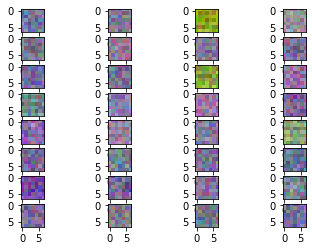

In [5]:
import matplotlib.pyplot as plt

for i in range(32):
    plt.subplot(8, 4, i + 1)
    plt.imshow(2*subnet.conv1.weight[i, :, :, :].permute((1, 2, 0)).cpu().detach().numpy() + .5)

